In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's import the dataset
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# the data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [5]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# Check the shape of a single example
train_data[0].shape, train_labels.shape[0]

((28, 28), 60000)

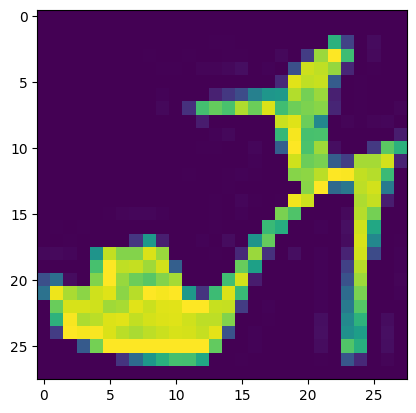

In [7]:
# Okay, 60,000 training examples each with shape (28,28) and a label each as well as 10,000 
# test examples of shape (28,28).

# But these are just numbers, let's visualize

# Plot a single example
plt.imshow(train_data[9])

In [8]:
# Check our samples label
train_labels[7]

2

It looks like our labels are in numeric form. And while it is fine for a neural network, you might want to have them in human readable form.

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Pullover')

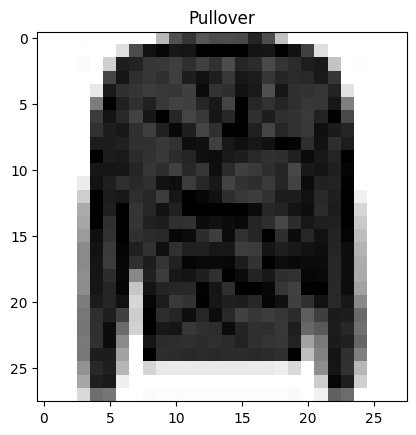

In [10]:
# Plot an example image and it's label
plt.imshow(train_data[27], cmap=plt.cm.binary) # Change the color to black and white
plt.title(class_names[train_labels[27]])

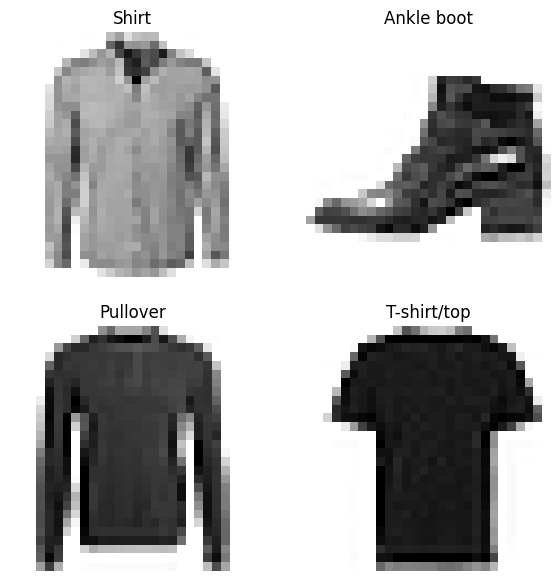

In [11]:
# Plot multiple random images of Fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [12]:
# Let's build a model to figure out the relationship between pixels and their labels

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input layer, we had to  reshape 28x28 to 784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # Output shape is 10, activation function is softmax
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 969us/step - loss: 2.1603 - accuracy: 0.2005 - val_loss: 1.7961 - val_accuracy: 0.2760
Epoch 2/10
1875/1875 [==============================] - 1s 789us/step - loss: 1.7443 - accuracy: 0.2634 - val_loss: 1.6861 - val_accuracy: 0.2722
Epoch 3/10
1875/1875 [==============================] - 2s 910us/step - loss: 1.6648 - accuracy: 0.2848 - val_loss: 1.6189 - val_accuracy: 0.3050
Epoch 4/10
1875/1875 [==============================] - 2s 905us/step - loss: 1.6015 - accuracy: 0.3078 - val_loss: 1.5508 - val_accuracy: 0.3251
Epoch 5/10
1875/1875 [==============================] - 2s 915us/step - loss: 1.5520 - accuracy: 0.3237 - val_loss: 1.5385 - val_accuracy: 0.3267
Epoch 6/10
1875/1875 [==============================] - 2s 856us/step - loss: 1.5280 - accuracy: 0.3338 - val_loss: 1.4961 - val_accuracy: 0.3694
Epoch 7/10
1875/1875 [==============================] - 2s 914us/step - loss: 1.4968 - accuracy: 0.3465 - val_loss: 1.4862 -

In [13]:
# Check the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [15]:
# Let's normalize the data (between 0 and 1) by dividing all the numbers by maximum i.e., 255.0

train_data = train_data/255.0
test_data = test_data/255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [16]:
# Let's build a model again with normalized data as input

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Seuqential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),# Input layer, used Flatten because we had to reshape 28x28 to 784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")# Output shape is 10, activation is softmax
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
norm_history = model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 933us/step - loss: 1.2509 - accuracy: 0.5494 - val_loss: 0.8541 - val_accuracy: 0.7233
Epoch 2/10
1875/1875 [==============================] - 2s 897us/step - loss: 0.7763 - accuracy: 0.7393 - val_loss: 0.7572 - val_accuracy: 0.7433
Epoch 3/10
1875/1875 [==============================] - 2s 915us/step - loss: 0.7046 - accuracy: 0.7502 - val_loss: 0.7103 - val_accuracy: 0.7464
Epoch 4/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.6705 - accuracy: 0.7620 - val_loss: 0.6897 - val_accuracy: 0.7577
Epoch 5/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.6425 - accuracy: 0.7680 - val_loss: 0.6707 - val_accuracy: 0.7598
Epoch 6/10
1875/1875 [==============================] - 2s 812us/step - loss: 0.6170 - accuracy: 0.7765 - val_loss: 0.6588 - val_accuracy: 0.7681
Epoch 7/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.5986 - accuracy: 0.7810 - val_loss: 0.6718 -

<Axes: title={'center': 'Normalized Data'}>

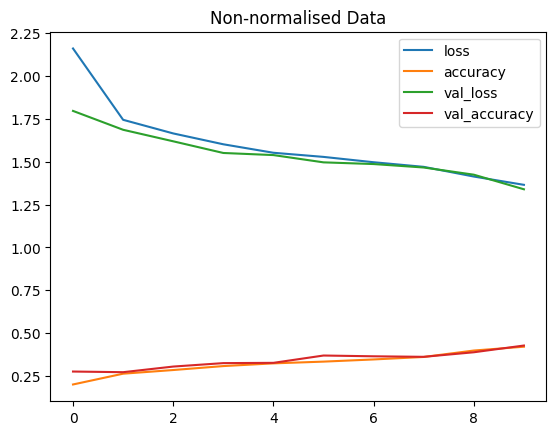

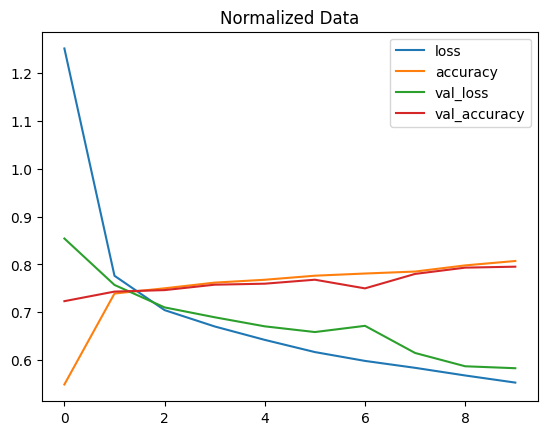

In [17]:
# Let's plot each model's history (their loss curves)

# Non-normalized data's loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalised Data")

# Normalized data's loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

In [18]:
# How about we find the ideal learning rates and see what happens?

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input layer (we had to reshape 28x28 to 784 so we have used Flatten)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # Output shape is 10, activation is softmax
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the model
find_lr_history = model_2.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels), callbacks=[lr_scheduler], verbose=1)

Epoch 1/40
1875/1875 [==============================] - 2s 865us/step - loss: 1.0276 - accuracy: 0.6133 - val_loss: 0.7223 - val_accuracy: 0.7440 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 809us/step - loss: 0.6569 - accuracy: 0.7635 - val_loss: 0.6562 - val_accuracy: 0.7687 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 859us/step - loss: 0.6170 - accuracy: 0.7790 - val_loss: 0.6391 - val_accuracy: 0.7728 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 903us/step - loss: 0.6002 - accuracy: 0.7869 - val_loss: 0.6154 - val_accuracy: 0.7842 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 873us/step - loss: 0.5909 - accuracy: 0.7924 - val_loss: 0.6330 - val_accuracy: 0.7764 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 907us/step - loss: 0.5838 - accuracy: 0.7941 - val_loss: 0.6300 - val_accuracy: 0.7846 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Finding the ideal learning rate')

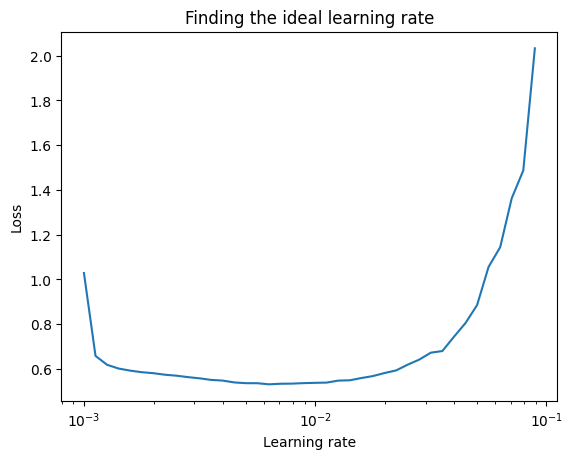

In [19]:
# Plot the Learning Rate decay curve
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # Want X axis to be log scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [20]:
# It seems like 10^-2 or 0.001 is the ideal learning rate.
# Let's refit the model using the ideal learning rate.

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input layer, we used Flatten in order to reshape 28x28 to 784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_3.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 2s 874us/step - loss: 1.0039 - accuracy: 0.6104 - val_loss: 0.6797 - val_accuracy: 0.7512
Epoch 2/20
1875/1875 [==============================] - 2s 915us/step - loss: 0.6297 - accuracy: 0.7668 - val_loss: 0.6385 - val_accuracy: 0.7711
Epoch 3/20
1875/1875 [==============================] - 2s 880us/step - loss: 0.5911 - accuracy: 0.7850 - val_loss: 0.6323 - val_accuracy: 0.7678
Epoch 4/20
1875/1875 [==============================] - 2s 904us/step - loss: 0.5717 - accuracy: 0.7970 - val_loss: 0.6010 - val_accuracy: 0.7838
Epoch 5/20
1875/1875 [==============================] - 2s 912us/step - loss: 0.5603 - accuracy: 0.8026 - val_loss: 0.5829 - val_accuracy: 0.7953
Epoch 6/20
1875/1875 [==============================] - 2s 850us/step - loss: 0.5502 - accuracy: 0.8060 - val_loss: 0.6181 - val_accuracy: 0.7807
Epoch 7/20
1875/1875 [==============================] - 2s 936us/step - loss: 0.5459 - accuracy: 0.8081 - val_loss: 0.5917 -

In [ ]:
# First we will create a classification matrix to visualize it's predictions 
# across the different classes

import itertools 
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]